In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.inspection import permutation_importance







In [49]:
data = pd.read_csv(r"C:\Users\Marcelo\Documents\ORACLE NEXT EDUCATION\ESPECIALIZACION DATA SCIENCE\estadistica con python\Alura challenge final\df_norm_limpio.csv")
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn,Cuentas_Diarias
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,No,One year,Yes,Mailed check,65.60,593.30,0002-ORFBO,No,2.186667
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,0003-MKNFE,No,1.996667
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,0004-TLHLJ,Yes,2.463333
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,0011-IGKFF,Yes,3.266667
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,0013-EXCHZ,Yes,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,55.15,742.90,9987-LUTYD,No,1.838333
7039,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,9992-RRAMN,Yes,2.836667
7040,Male,0,No,No,2,Yes,No,DSL,No,Yes,...,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,9992-UJOEL,No,1.676667
7041,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,...,No,Yes,Two year,No,Mailed check,67.85,4627.65,9993-LHIEB,No,2.261667


In [50]:
data.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.500000,398.550000,1.183333
50%,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [51]:
data.describe(include='O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,customerID,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,7043,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,9995-HOTOH,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,1,5174


In [52]:
data.drop(columns={'customerID'}, inplace=True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn,Cuentas_Diarias
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,No,2.186667
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,No,1.996667
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes,2.463333
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes,3.266667
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Yes,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,DSL,Yes,No,...,Yes,No,No,One year,No,Mailed check,55.15,742.90,No,1.838333
7039,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes,2.836667
7040,Male,0,No,No,2,Yes,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No,1.676667
7041,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,No,2.261667


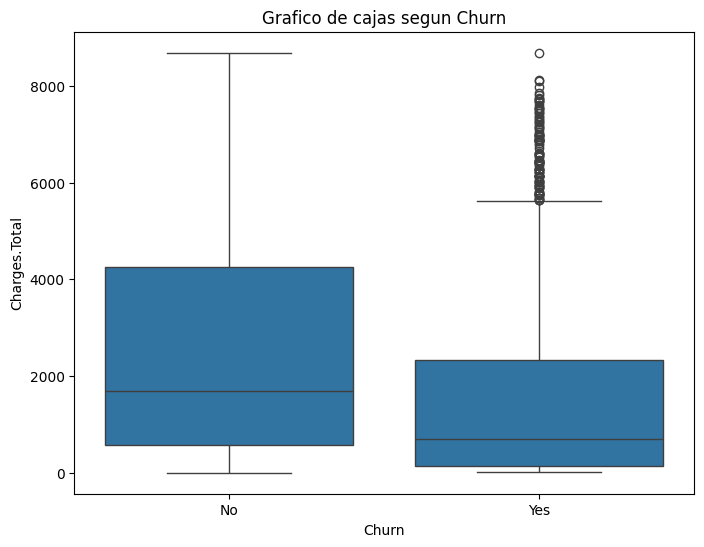

In [53]:
ax,fig=plt.subplots(figsize=(8,6))
sns.boxplot(data=data,y='Charges.Total',x='Churn')
plt.title('Grafico de cajas segun Churn')
plt.show()

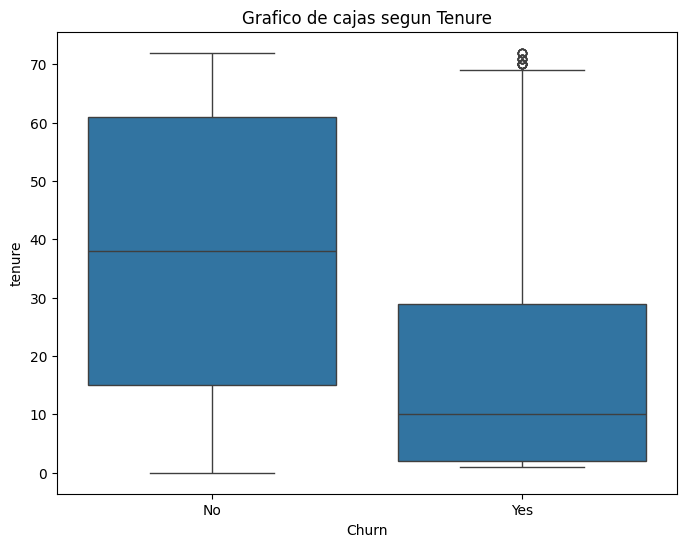

In [54]:
ax,fig=plt.subplots(figsize=(8,6))
sns.boxplot(data=data,y='tenure',x='Churn')
plt.title('Grafico de cajas segun Tenure')
plt.show()

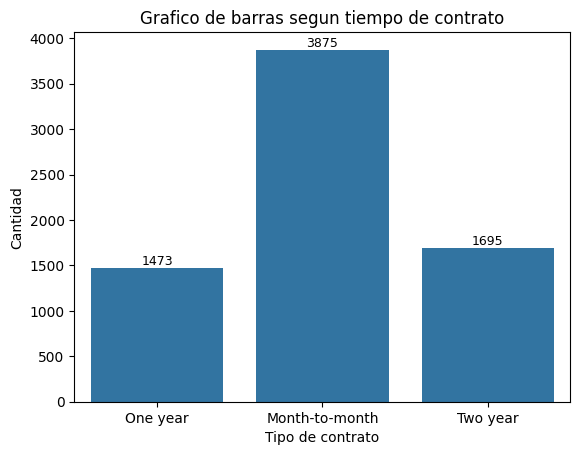

In [55]:
ax=sns.countplot(data=data, x='Contract')
ax.bar_label(ax.containers[0], fontsize=9) 
plt.title('Grafico de barras segun tiempo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad')


plt.show()

In [56]:
columnas = data.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','gender','Partner','Dependents','PhoneService','PaperlessBilling']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

data_transformada = one_hot.fit_transform(data)
column_names = one_hot.get_feature_names_out()
df_final = pd.DataFrame(data_transformada, columns=column_names)
df_final

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,...,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__PaperlessBilling_Yes,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Churn,remainder__Cuentas_Diarias
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0,9,65.6,593.3,No,2.186667
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,9,59.9,542.4,No,1.996667
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0,4,73.9,280.85,Yes,2.463333
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1,13,98.0,1237.85,Yes,3.266667
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1,3,83.9,267.4,Yes,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0,13,55.15,742.9,No,1.838333
7039,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0,22,85.1,1873.7,Yes,2.836667
7040,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0,2,50.3,92.75,No,1.676667
7041,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0,67,67.85,4627.65,No,2.261667


In [57]:
df_final['remainder__Churn'].value_counts()

remainder__Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [58]:
df_final.describe(include='O')

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,...,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__PaperlessBilling_Yes,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Churn,remainder__Cuentas_Diarias
count,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,...,7043.0,7043.0,7043.0,7043.0,7043,7043,7043.00,7043.0,7043,7043.000000
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2,73,1585.00,6531.0,2,1585.000000
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0,1,20.05,20.2,No,0.668333
freq,3653.0,6361.0,4072.0,4622.0,3947.0,5517.0,3545.0,5517.0,5024.0,3955.0,...,3641.0,4933.0,6361.0,4171.0,5901,613,61.00,11.0,5174,61.000000


In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_final['remainder__Churn'] = le.fit_transform(df_final['remainder__Churn'])

In [60]:
df_final.corr()['remainder__Churn']

onehotencoder__MultipleLines_No                          -0.032569
onehotencoder__MultipleLines_No phone service            -0.011942
onehotencoder__MultipleLines_Yes                          0.040102
onehotencoder__InternetService_DSL                       -0.124214
onehotencoder__InternetService_Fiber optic                0.308020
onehotencoder__InternetService_No                        -0.227890
onehotencoder__OnlineSecurity_No                          0.342637
onehotencoder__OnlineSecurity_No internet service        -0.227890
onehotencoder__OnlineSecurity_Yes                        -0.171226
onehotencoder__OnlineBackup_No                            0.268005
onehotencoder__OnlineBackup_No internet service          -0.227890
onehotencoder__OnlineBackup_Yes                          -0.082255
onehotencoder__DeviceProtection_No                        0.252481
onehotencoder__DeviceProtection_No internet service      -0.227890
onehotencoder__DeviceProtection_Yes                      -0.06

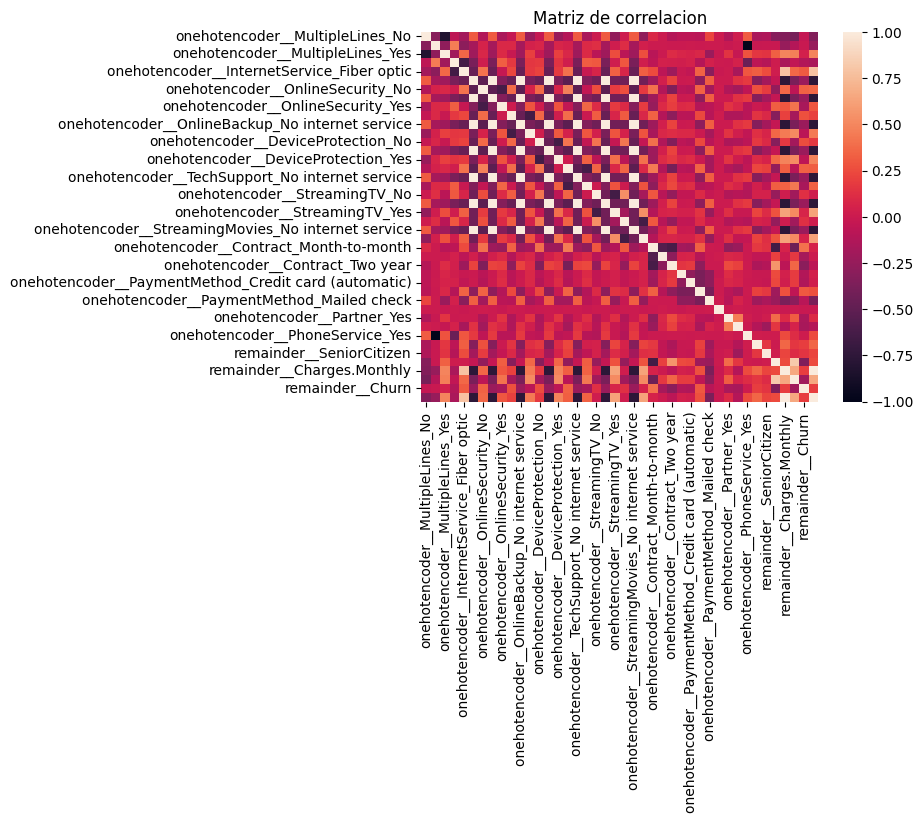

In [61]:
matriz_correlacion =df_final.corr()

sns.heatmap(data=matriz_correlacion)
plt.title('Matriz de correlacion')
plt.show()


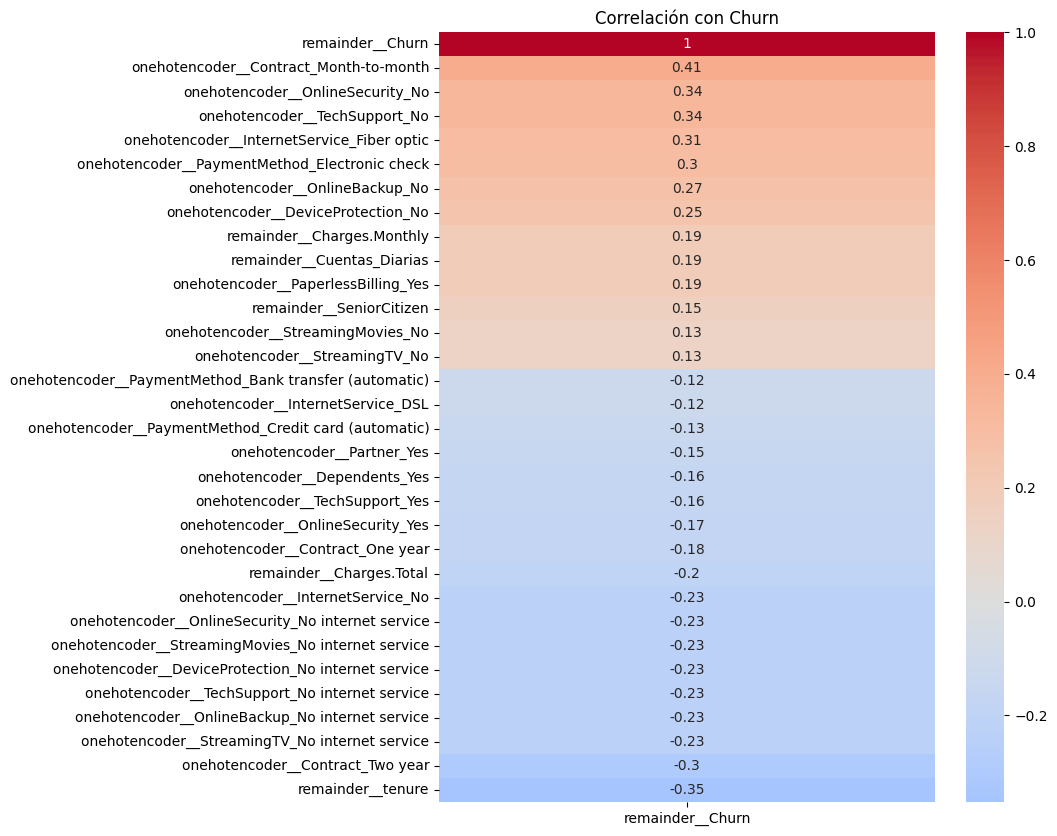

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_with_churn = df_final.corr()['remainder__Churn'].sort_values(ascending=False)

correlation_with_churn_filtered = correlation_with_churn[(correlation_with_churn > 0.1) | (correlation_with_churn < -0.1)]

plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_churn_filtered.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlación con Churn')
plt.show()


In [63]:
df_final.sample(10)

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,...,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__PaperlessBilling_Yes,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Churn,remainder__Cuentas_Diarias
2524,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0,64,109.2,6741.15,0,3.64
1709,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0,2,35.1,68.75,1,1.17
6930,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0,39,89.55,3474.45,1,2.985
6563,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0,23,66.25,1533.8,0,2.208333
5452,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0,58,61.05,3478.75,0,2.035
5841,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0,42,100.4,4303.65,0,3.346667
938,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0,50,98.25,4858.7,0,3.275
5566,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0,33,53.75,1857.3,0,1.791667
6151,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0,4,82.85,319.6,0,2.761667
1231,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0,30,55.65,1653.85,0,1.855


In [64]:
df_final.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No'

In [65]:
df_final.drop(columns={'onehotencoder__DeviceProtection_No internet service','onehotencoder__TechSupport_No internet service','onehotencoder__StreamingTV_No internet service','onehotencoder__StreamingMovies_No internet service','onehotencoder__OnlineSecurity_No internet service','onehotencoder__OnlineBackup_No internet service'}, inplace=True)

In [66]:
df_final.drop(columns={'remainder__Cuentas_Diarias'},inplace=True)

In [67]:
df_final

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_Yes,...,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__PaperlessBilling_Yes,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Churn
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0,9,65.6,593.3,0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0,9,59.9,542.4,0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0,4,73.9,280.85,1
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1,13,98.0,1237.85,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1,3,83.9,267.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,13,55.15,742.9,0
7039,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0,22,85.1,1873.7,1
7040,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0,2,50.3,92.75,0
7041,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0,67,67.85,4627.65,0


In [68]:
X= df_final.drop(columns=['remainder__Churn'])
y= df_final['remainder__Churn']

In [69]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [70]:
normalizacion = MinMaxScaler()
X_normalizado = normalizacion.fit_transform(X_temp)


In [71]:
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X_normalizado, y_temp)

In [72]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_normalizado, y_temp)

In [73]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)


In [74]:
### MODELO 1 RANDOM FOREST
#usando OVERSAMPLING
modelo1 = RandomForestClassifier(max_depth=10,random_state=42)
metricas = ['accuracy', 'precision', 'recall', 'f1']
resultados_over_RF =cross_validate(modelo1,X_over,y_over,cv=skf,scoring=metricas)
resultados_over_RF

{'fit_time': array([0.36257696, 0.35768056, 0.36683345, 0.35880256, 0.3606832 ]),
 'score_time': array([0.01638007, 0.0168457 , 0.01779151, 0.01659322, 0.0170598 ]),
 'test_accuracy': array([0.83091787, 0.85084541, 0.84057971, 0.83746224, 0.83867069]),
 'test_precision': array([0.80580357, 0.83352468, 0.81972789, 0.81348315, 0.80064309]),
 'test_recall': array([0.87198068, 0.87681159, 0.87318841, 0.87545345, 0.90217391]),
 'test_f1': array([0.83758701, 0.85462036, 0.84561404, 0.84333139, 0.8483816 ])}

In [75]:
for m in metricas:
    print(f"{m}: {resultados_over_RF[f'test_{m}'].mean():.4f}")

accuracy: 0.8397
precision: 0.8146
recall: 0.8799
f1: 0.8459


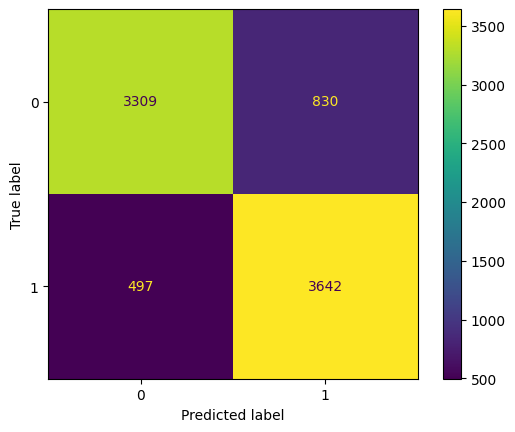

In [76]:
y_pred_over = cross_val_predict(modelo1, X_over, y_over, cv=skf)
matriz_confusion_over = confusion_matrix(y_over,y_pred_over)
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_over)
visualizacion.plot();

In [77]:
### RANDOM FORERT CON UNDERSAMPLING

modelo2 = RandomForestClassifier(max_depth=10,random_state=42)
resultados_under_RF =cross_validate(modelo2,X_under,y_under,cv=skf,scoring=metricas)
resultados_under_RF


{'fit_time': array([0.16721654, 0.16672611, 0.16335583, 0.16695881, 0.16639853]),
 'score_time': array([0.01064253, 0.01037431, 0.0101552 , 0.01025438, 0.01018095]),
 'test_accuracy': array([0.78595318, 0.73411371, 0.75083612, 0.77926421, 0.75752508]),
 'test_precision': array([0.7537092 , 0.74305556, 0.72321429, 0.76340694, 0.775     ]),
 'test_recall': array([0.84949833, 0.71571906, 0.81270903, 0.80936455, 0.72575251]),
 'test_f1': array([0.79874214, 0.72913118, 0.76535433, 0.78571429, 0.74956822])}

In [78]:
for m in metricas:
    print(f"{m}: {resultados_under_RF[f'test_{m}'].mean():.4f}")

accuracy: 0.7615
precision: 0.7517
recall: 0.7826
f1: 0.7657


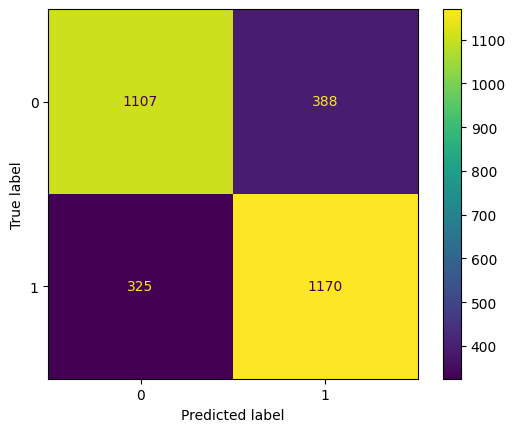

In [79]:
y_pred_under = cross_val_predict(modelo2, X_under, y_under, cv=skf)
matriz_confusion_under = confusion_matrix(y_under,y_pred_under)
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_under)
visualizacion.plot();

In [80]:
#modelo 2 KNN

modelo3 = KNeighborsClassifier(n_neighbors=5)
resultados_over_KNN =cross_validate(modelo3,X_over,y_over,cv=skf,scoring=metricas)
resultados_over_KNN

{'fit_time': array([0.00156331, 0.00169396, 0.00176263, 0.00155497, 0.00158763]),
 'score_time': array([0.02511501, 0.01811934, 0.01508069, 0.0144403 , 0.01535225]),
 'test_accuracy': array([0.77355072, 0.7826087 , 0.80072464, 0.78731118, 0.7939577 ]),
 'test_precision': array([0.72271386, 0.73780488, 0.74363992, 0.73631841, 0.73212583]),
 'test_recall': array([0.88768116, 0.87681159, 0.9178744 , 0.89480048, 0.92753623]),
 'test_f1': array([0.79674797, 0.8013245 , 0.82162162, 0.80786026, 0.81832712])}

In [81]:
for m in metricas:
    print(f"{m}: {resultados_over_KNN[f'test_{m}'].mean():.4f}")

accuracy: 0.7876
precision: 0.7345
recall: 0.9009
f1: 0.8092


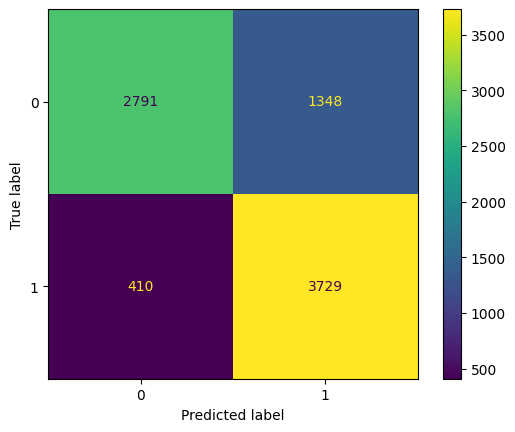

In [107]:
y_pred_over_KNN = cross_val_predict(modelo3, X_over, y_over, cv=skf)
matriz_confusion_over_KNN = confusion_matrix(y_over,y_pred_over_KNN)
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_over_KNN)
visualizacion.plot();
plt.savefig("matriz_confusion")
plt.show()

In [83]:
##undersampling con KNN
modelo4 = KNeighborsClassifier(n_neighbors=5)
resultados_under_KNN =cross_validate(modelo4,X_under,y_under,cv=skf,scoring=metricas)
resultados_under_KNN

{'fit_time': array([0.00564885, 0.00076485, 0.00080633, 0.0008986 , 0.00089645]),
 'score_time': array([0.02069139, 0.02146816, 0.02136326, 0.02126312, 0.02107215]),
 'test_accuracy': array([0.73913043, 0.7090301 , 0.72408027, 0.73244147, 0.71070234]),
 'test_precision': array([0.70028011, 0.68768769, 0.69252874, 0.6991404 , 0.70588235]),
 'test_recall': array([0.8361204 , 0.76588629, 0.80602007, 0.81605351, 0.72240803]),
 'test_f1': array([0.76219512, 0.72468354, 0.74497682, 0.75308642, 0.71404959])}

In [84]:
for m in metricas:
    print(f"{m}: {resultados_under_KNN[f'test_{m}'].mean():.4f}")

accuracy: 0.7231
precision: 0.6971
recall: 0.7893
f1: 0.7398


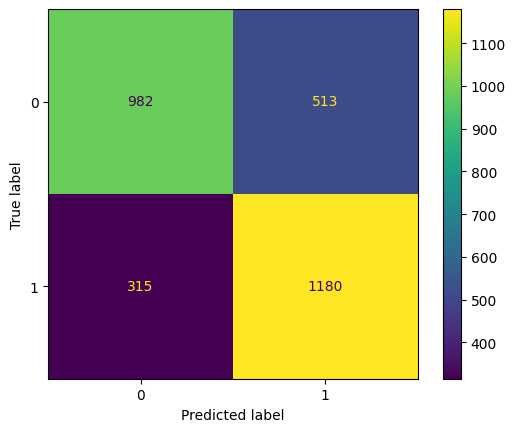

In [85]:
y_pred_under_KNN = cross_val_predict(modelo4, X_under, y_under, cv=skf)
matriz_confusion_under_KNN = confusion_matrix(y_under,y_pred_under_KNN)
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_under_KNN)
visualizacion.plot();

In [86]:
x_test_normalizado = normalizacion.transform(X_test)
modelo3.fit(X_over,y_over)
y_predict=modelo3.predict(x_test_normalizado)
modelo3.score(x_test_normalizado,y_test)

0.7146912704045423

In [87]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1035
           1       0.48      0.76      0.59       374

    accuracy                           0.71      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.78      0.71      0.73      1409



In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 20, 2)),  
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}
scorer = make_scorer(recall_score, pos_label=1)

grid = GridSearchCV(modelo3, param_grid=param_grid, 
                    cv=skf, scoring=scorer, n_jobs=-1)
grid.fit(X_over, y_over)

# 10. Evaluar en test
y_pred = grid.predict(x_test_normalizado)
print("Mejor combinación de hiperparámetros:")
print(grid.best_params_)
print("\nEvaluación en Test:")
print(classification_report(y_test, y_pred))

Mejor combinación de hiperparámetros:
{'n_neighbors': 19, 'p': 2, 'weights': 'distance'}

Evaluación en Test:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1035
           1       0.46      0.75      0.57       374

    accuracy                           0.70      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg       0.77      0.70      0.71      1409



In [101]:
X_over_df = pd.DataFrame(X_over, columns=X.columns)

resultados = permutation_importance(modelo3, X_over, y_over, 
                                    scoring='recall', 
                                    n_repeats=10, random_state=42, n_jobs=-1)

importancias = resultados.importances_mean
indices = importancias.argsort()[::-1]
top_features = [X_over_df.columns[i] for i in indices]

recalls = {}

for n in range(5, len(top_features)+1, 5):
    selected_features = top_features[:n]
    modelo3.fit(X_over_df[selected_features], y_over)
    y_pred = modelo3.predict(X_over_df[selected_features])
    recall = recall_score(y_over, y_pred)
    recalls[n] = recall

# Mostrar resultados
for n, r in recalls.items():
    print(f"{n} variables: Recall = {r:.4f}")

5 variables: Recall = 0.8454
10 variables: Recall = 0.8616
15 variables: Recall = 0.8891
20 variables: Recall = 0.9205
25 variables: Recall = 0.9401
30 variables: Recall = 0.9507


In [106]:
for i in indices:
    print(f"{X_over_df.columns[i]}: {importancias[i]:.4f}")

remainder__tenure: 0.0317
onehotencoder__gender_Male: 0.0257
onehotencoder__Partner_Yes: 0.0212
remainder__Charges.Total: 0.0191
onehotencoder__PaperlessBilling_Yes: 0.0184
onehotencoder__Dependents_Yes: 0.0147
remainder__Charges.Monthly: 0.0113
remainder__SeniorCitizen: 0.0095
onehotencoder__OnlineSecurity_No: 0.0041
onehotencoder__PaymentMethod_Electronic check: 0.0036
onehotencoder__PaymentMethod_Bank transfer (automatic): 0.0033
onehotencoder__MultipleLines_No: 0.0030
onehotencoder__OnlineSecurity_Yes: 0.0025
onehotencoder__MultipleLines_Yes: 0.0024
onehotencoder__StreamingMovies_No: 0.0020
onehotencoder__StreamingMovies_Yes: 0.0018
onehotencoder__StreamingTV_Yes: 0.0017
onehotencoder__StreamingTV_No: 0.0016
onehotencoder__PaymentMethod_Credit card (automatic): 0.0014
onehotencoder__OnlineBackup_Yes: 0.0013
onehotencoder__OnlineBackup_No: 0.0011
onehotencoder__InternetService_Fiber optic: 0.0009
onehotencoder__DeviceProtection_Yes: 0.0007
onehotencoder__DeviceProtection_No: 0.0006


In [105]:
recalls = {}
x_test_df = pd.DataFrame(x_test_normalizado, columns=X.columns)

for n in range(5, len(top_features)+1, 5):
    selected_features = top_features[:n]
    modelo3.fit(X_over_df[selected_features], y_over)
    y_pred = modelo3.predict(x_test_df[selected_features])
    recall = recall_score(y_test, y_pred)
    recalls[n] = recall

# Mostrar resultados
for n, r in recalls.items():
    print(f"{n} variables: Recall = {r:.4f}")

5 variables: Recall = 0.5936
10 variables: Recall = 0.5642
15 variables: Recall = 0.6230
20 variables: Recall = 0.6203
25 variables: Recall = 0.6845
30 variables: Recall = 0.7353


INFORME FINAL

LIMPIEZA DE DATOS:

Se usó la base trabajada en el alura challengue anterior, se quitó la columna CustomerID, ya que no generaba valor para el modelo predictivo. Se realizó un análisis descriptivo de las variables, se observó el monto total pagado para las personas que dejaron el servicio presentan muchos outliers.
Se realizó el encoding a través del onehotencoder, se realizó un análisis de la correlación, pero al ser muchas variables se optó por solo analizar las que tienen una correlación mayor a 0.1 y menor a -0.1. Con este análisis se observó que existían variables que tenían la misma correlación con churn debido a que provenían de la misma variable. Un ejemplo de lo comentado son las variables relacionadas a los servicios de streaming y más que fueron respondidas con "No internet service", todas ellas tienen una correlación de -0.23 porque dependen de si se posee el servicio de internet o no. Similar a ello pasa con el monto diario y monto mensual, son lo mismo y solo cambia el espacio temporal. Por ello se mantuvo la columna InternetService y ChargesTotal.

MODELADO PREDICTIVO:

Se separó la data en temp y test, el objetivo de esto es normalizar y hacer, por separado, el oversampling y undersampling para evitar el impacto del desbalance de datos. Todos estos tratamientos fueron aplicados a la data temp, que resultó en dos datas: over y under.
Los modelos elegidos fueron random forest y KNN. Se realizó el cross validation para cada modelo + over/under y se midieron las métricas respectivas como: 'accuracy', 'precision', 'recall', 'f1'.
Tras el análisis se observa que el modelo KNN con oversampling fue el ganador obteniendo las siguientes métricas de validación:


accuracy: 0.7876
precision: 0.7345
recall: 0.9009
f1: 0.8092




Nos centramos en el recall que es lo mas relevante en nuestro escenario, pues mientras sea más alto, clasificaremos de mejor manera a los posibles clientes que dejen el servicio. Para este análisis usamos también una matriz de confusión para evaluar de mejor manera el resultado.





![Matriz de confusión](matriz_confusion.png)


Con ello se procedió a evaluar el modelo con nuestra data clasificada como Test:


                precision    recall  f1-score   support

           0       0.89      0.70      0.78      1035
           1       0.48      0.76      0.59       374

    accuracy                           0.71      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.78      0.71      0.73      1409



Nos concetramos en el recall de los 1, que es 0.76.


El siguiente objetivo es intentar ajustar los hiperparámetros para mejorar nuestra predicción, intentamos ajustar con lo siguiente:


param_grid = {
    'n_neighbors': list(range(1, 20, 2)),  
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}


pero no obtuvimos una mejora, por lo que mantuvimos el parámetro default de n_neighbors = 5.

Se realizó el análisis de importancias:

tenure 

Impacto positivo: A menor tiempo de permanencia, mayor probabilidad de churn.

Clientes nuevos suelen abandonar más.

gender_Male 

Impacto positivo: Ser hombre se asocia ligeramente con más churn.

Partner_Yes 

Impacto positivo: Tener pareja está asociado con menos churn (coeficiente positivo, pero depende del encoding exacto).

Charges.Total 

Impacto positivo: A mayor monto total facturado, más propensos al churn, probablemente por acumulación de costos.

PaperlessBilling_Yes

Impacto positivo: Facturación sin papel puede estar relacionada con más churn, quizás por falta de contacto físico con el servicio.



CONCLUSIÓN:


Tras aplicar técnicas de preprocesamiento, análisis exploratorio, balanceo de clases y ajuste de modelos, se concluye que el modelo KNN con oversampling es el más efectivo para predecir la salida de clientes (churn), priorizando la métrica recall, clave en este escenario. El modelo logró un recall del 76% en datos de prueba, lo cual significa que identifica correctamente a la mayoría de los clientes que abandonan el servicio.

El análisis de importancia de variables revela que factores como la antigüedad del cliente (tenure), el género masculino, el monto total facturado, la facturación electrónica y la condición de tener pareja influyen significativamente en la decisión de continuar o no con el servicio. Estos hallazgos pueden ayudar a diseñar acciones preventivas focalizadas para reducir la pérdida de clientes.



